In [2]:
!ls ../data/PICKLE

coarse_resample       geo2rdr			split_range_spectrum
coarse_resample.xml   geo2rdr.xml		split_range_spectrum.xml
cropraw		      geocode			startup
cropraw.xml	      geocode.xml		startup.xml
cropslc		      geocodeoffsets		sub_band_interferogram
cropslc.xml	      geocodeoffsets.xml	sub_band_interferogram.xml
dense_offsets	      interferogram		sub_band_resample
dense_offsets.xml     interferogram.xml		sub_band_resample.xml
endup		      ionosphere		topo
endup.xml	      ionosphere.xml		topo.xml
filter		      misregistration		unwrap
filter.xml	      misregistration.xml	unwrap.xml
filter_high_band      preprocess		unwrap_high_band
filter_high_band.xml  preprocess.xml		unwrap_high_band.xml
filter_low_band       refined_resample		unwrap_low_band
filter_low_band.xml   refined_resample.xml	unwrap_low_band.xml
fine_resample	      rubber_sheet_azimuth	verifyDEM
fine_resample.xml     rubber_sheet_azimuth.xml	verifyDEM.xml
formslc		      rubber_sheet_range
formslc.xml	      rubber_sheet_range.xml


In [42]:
!cat ../data/PICKLE/interferogram.xml

<stripmapAppContext>
    <property name="azimuthoffsetimagename">
        <value>azimuth.off</value>
    </property>
    <property name="azimuthrubbersheetimagename">
        <value>azimuth_sheet.off</value>
    </property>
    <property name="chirpextension">
        <value>0</value>
    </property>
    <property name="coarsecoregslcfilename">
        <value>coarse_coreg.slc</value>
        <doc>coarse coreg slc name</doc>
    </property>
    <property name="coherencename">
        <value>phsig.cor</value>
        <doc>Coherence file name</doc>
    </property>
    <property name="coregslcdirectoryname">
        <value>coregisteredSlc</value>
        <doc>directory that contains coregistered slc</doc>
    </property>
    <property name="correlationname">
        <value>topophase.cor</value>
        <doc>Correlation file name</doc>
    </property>
    <property name="demcropfilename">
        <value>dem.crop</value>
        <doc>cropped dem file name</doc>
    </property>
    <property 

In [29]:
import pickle
from isce2.components import isceobj
import numpy as np
import matplotlib.pyplot as plt


2023-08-30 12:29:45,656 - matplotlib - DEBUG - matplotlib data path: /usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data
2023-08-30 12:29:45,659 - matplotlib - DEBUG - CONFIGDIR=/root/.config/matplotlib
2023-08-30 12:29:45,659 - matplotlib - DEBUG - interactive is False
2023-08-30 12:29:45,660 - matplotlib - DEBUG - platform is linux
2023-08-30 12:29:45,680 - matplotlib - DEBUG - CACHEDIR=/root/.cache/matplotlib
2023-08-30 12:29:45,681 - matplotlib.font_manager - DEBUG - Using fontManager instance from /root/.cache/matplotlib/fontlist-v330.json


In [43]:
with open("../data/PICKLE/interferogram", "rb") as fp:
    res = pickle.load(fp)

In [44]:
res

{'stripmapProc': {'ISCE_VERSION': 'Release: 2.6.3, svn-, 20230418. Current svn-'}, 'reference': {'sensor': {'imagefile': ['/permafrost-prediction/data/alos_palsar/ALPSRP021272170/20060618/ALPSRP021272170/IMG-HH-ALPSRP021272170-H1.0__D'], 'leaderfile': ['/permafrost-prediction/data/alos_palsar/ALPSRP021272170/20060618/ALPSRP021272170/LED-ALPSRP021272170-H1.0__D'], 'resample_flag': '', 'output': '20060618_raw/20060618.raw', 'family': 'alos', 'name': 'reference'}, 'width': 20688, 'iBias': 63.5, 'qBias': 63.5, 'range_sampling_rate': 32000000.0, 'prf': 2132.1961620469, 'pri': 0.0004690000000000018, 'pulse_length': 2.7e-05, 'chirp_slope': -1037037037037.0371, 'wavelength': 0.2360571, 'lookSide': -1, 'frame': {'schheight': None, 'schvelocity': None, 'number_range_bins': 9480, 'squint_angle': 0.0009297207816125715, 'polarization': 'HH', 'number_of_samples': 20688, 'number_of_lines': 34968, 'starting_range': 856460.0, 'far_range': 953367.9120485, 'sensing_start': datetime.datetime(2006, 6, 18, 

In [5]:
from isce2.components import isceobj
import numpy as np

In [3]:
# from DownsampleUnwrapper
def load_img(xml_path):
    img = isceobj.createImage()
    img.load(xml_path)
    _dtype_map = {'cfloat':np.complex64,'float':np.float32,'byte':np.uint8}
    dtype = _dtype_map[img.dataType.lower()]
    width = img.getWidth()
    length = img.getLength()
    im = np.fromfile(xml_path[:-4], dtype)
    assert img.bands in [1, 2], f"Unsupported number of bands: {img.bands}"
    if img.bands == 1:
        im = im.reshape([length,width])
    else:#the other option is the unw which is 2 bands BIL
        im = im.reshape([length, img.bands, width])
    return im

In [6]:
# Looking at SLC
im = load_img("../data/20060618_slc/20060618.slc.xml")

In [76]:
mag = np.abs(im)

In [78]:
mag_clip = np.clip(mag, 0.0, 5.0)

CPU times: user 321 ms, sys: 800 ms, total: 1.12 s
Wall time: 1.13 s


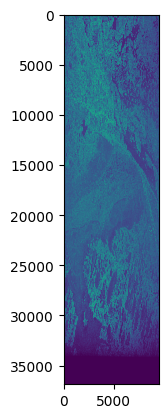

In [79]:
%%time
plt.imshow(mag_clip)

In [34]:
# Looking at interferogram?
intfg_flat = load_img("../data/interferogram/filt_topophase.flat.xml")
intfg_unw = load_img("../data/interferogram/filt_topophase.unw.xml")

In [37]:
intfg_flat.dtype, intfg_flat.shape, intfg_unw.dtype, intfg_unw.shape

(dtype('complex64'), (4608, 2370), dtype('float32'), (4608, 2, 2370))

2023-08-30 12:29:48,305 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-08-30 12:29:48,307 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-08-30 12:29:48,314 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-08-30 12:29:48,314 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-08-30 12:29:48,315 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='sca

(array([[   0.,    0.,    0., ...,   66.,   64.,   64.],
        [   0.,    0.,    0., ...,   65.,   64.,   65.],
        [   0.,    0.,    0., ...,   62.,   65.,   66.],
        ...,
        [1935.,  400., 1921., ...,   68.,   40.,    0.],
        [1934.,  408., 1916., ...,   69.,   40.,    0.],
        [1936.,  413., 1911., ...,   70.,   40.,    0.]]),
 array([-357.94726562, -266.08279419, -174.21833801,  -82.35386658,
           9.51059532,  101.37506104,  193.23953247,  285.10400391,
         376.96844482,  468.83291626,  560.6973877 ]),
 <a list of 2370 BarContainer objects>)

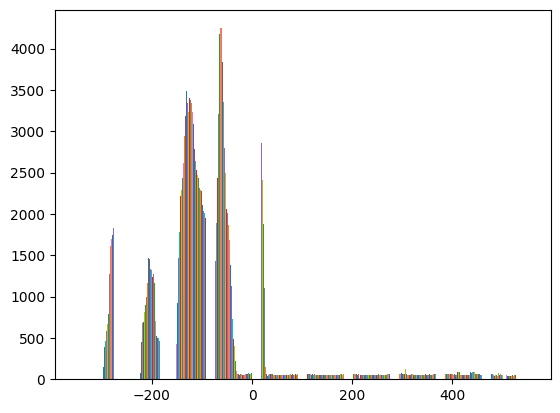

In [30]:
# from upsample_unw this appears to be phase (phase diff?) in radians
plt.hist(intfg[:,1,:])

In [38]:
angles = np.angle(intfg_flat)

2023-08-30 12:36:24,214 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f855d6a5190>


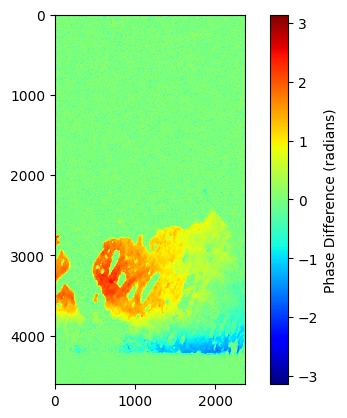

In [40]:
# Plot the unwrapped phase or flattened interferogram
plt.imshow(angles, cmap='jet')
plt.colorbar(label='Phase Difference (radians)')
plt.show()

2023-08-30 12:30:51,412 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f8561a25430>
2023-08-30 12:30:51,418 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2023-08-30 12:30:51,418 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-08-30 12:30:51,419 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-08-30 12:30:51,419 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/local/lib/python3.8

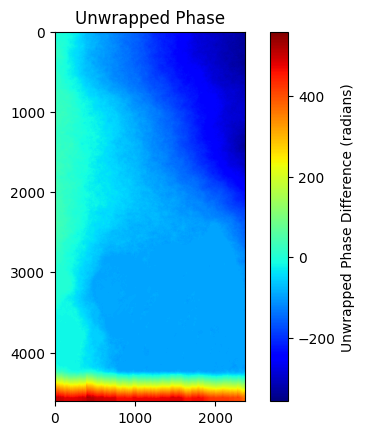

In [33]:
# Plot the unwrapped phase or flattened interferogram
plt.imshow(intfg[:,1,:], cmap='jet')
plt.colorbar(label='Unwrapped Phase Difference (radians)')
plt.show()